<div id="homecell"
     style="background-color:rgba(245,245,245,1); 
            line-height: 1.6; 
            font-size:15px; 
            font-family:Helvetica;
            border-radius:5px;
            padding-top: 5px;
            padding-right: 10px;
            padding-bottom: 5px;
            padding-left: 15px;">
<p style="color:rgba(200,200,200,1);
          font-size:18px;
          text-align: left">CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2023</p>
    <h1 style="text-align:left;">Game, Learning and Optimization:</h1>
    <h3 style="text-align:right;">Exploring Secondary Stats Priority for Blood Death Knights in World of Warcraft</h3>
<ul>
    <li>Name: <span style="color:rgba(50,50,255,1);">Xin Cai</span></li>
    <li>Email: <span style="color:rgba(50,50,255,1);">xcai72@wisc.edu</span></li>
    <li>Due: <span style="color:rgba(50,50,255,1);">May.05 2023</span></li>
    </ul>
</div>
<hr>
<div style="background-color:rgba(245,245,245,1); 
            line-height: 1.6; 
            font-size:15px; 
            font-family:Helvetica;
            border-radius:5px;
            padding-top: 5px;
            padding-right: 15px;
            padding-bottom: 5px;
            padding-left: 15px;">
    <h3>Table of Contents</h3>
    <ol>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#mathematical_model">Mathematical Model</a></li>
            <ol style="list-style-type: none">
                <li><span>2.1</span> <a href="#2.1">Gameplay Mechanism</a></li>
                <li><span>2.2</span> <a href="#2.2">Model Construction</a></li>
            </ol>
        <li><a href="#solution">Solution</a></li>
            <ol style="list-style-type: none">
                <li><span>3.1</span> <a href="#3.1">Helper Functions</a></li>
                <li><span>3.2</span> <a href="#3.2">Model Solving</a></li>
            </ol>
        <li><a href="#results">Results and Discussion</a></li>
            <ol style="list-style-type: none">
                <li><span>4.1</span> <a href="#4.1">Results Visualization and Interpretation</a></li>
                <li><span>4.2</span> <a href="#4.2">Sensitivity Analysis and Limitation</a></li>
            </ol>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>

<div id="introduction"
     style="background-color:rgba(245,235,210,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 24px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>1. Introduction</b></p>
</div>

Virtual games have become an increasingly popular form of entertainment in today's society. However, their value extends beyond mere recreation. As a result of recent research, it has been discovered that virtual games provide an exceptional environment for learning and problem-solving. In particular, games such as World of Warcraft present a wide range of scenarios that can be used to build and solve optimization problems. This connection between games, learning, and optimization forms the foundation of my project. As a former player of World of Warcraft who enjoys both reading forums and researching in-game questions mathematically, I am particularly intrigued by the potential for using virtual games as a platform for optimization problems. By leveraging the unique characteristics of virtual games, I aim to investigate a specific research question and contribute to a deeper understanding of the optimization process.

![intro](intro.svg)

The background of World of Warcraft and the context of our project question are introduced in the above diagram. **`Box-0`** represents the starting point to enter the game world. **`Box-1`** involves selecting a class and a specialization associated with that class. With 13 classes available in the game, each with 2 to 4 specializations, players have many options. These specializations fall into three roles: tank, damage dealer, and healer. Our project focuses on the Blood Death Knight specialization. **`Box-2`** presents different gameplay styles, such as PVE (player vs environment) and PVP (player vs player). Our project question is defined in the PVE gameplay style. players choose their settings in Box-1 and Box-2 mainly based on their preferences.

The next three boxes tend to offer a large number of scenarios in which an optimization problem can be formulated in-game. In **`Box-3`**, players must choose their talent points from a tree-like structure. For this project, we have chosen a default talent. In **`Box-4`**, players must construct their spell rotations for various combat scenarios. For our project, we have also selected a default rotation. In **`Box-5`**, players must make decisions on item selection to build their gear. Our project question is defined in this field, with one frequently asked question being "What is the priority of secondary stats?".

A few years ago, as a World of Warcraft player, I attempted to approach the question of optimal secondary stat allocation using a mathematical method. However, at that time, my knowledge was limited to high school level mathematics, and the only model I could construct was a simple quadratic function (y = ax^2 + b). I explored how to find an optimal solution given a fixed amount of secondary stats allocated to Mastery and Versatility. Unfortunately, I lacked the mathematical tools to construct and solve more complex models. Now, with more advanced mathematical knowledge and tools at my disposal, I am revisiting this question and developing a more sophisticated optimization model.

In this report, we present an optimization approach for maximizing the survivability of the Blood Death Knight in World of Warcraft by optimizing their secondary stats. In Section 2, we provide background information on necessary game mechanisms and introduce the non-linear programming model we constructed for the problem. Section 3 discusses the implementation of the mathematical model, including a list of helper functions. In Section 4, we group related parameters and solve the model in batches, presenting our findings using a set of stacked bar charts. We also conduct a simple parametric analysis to analyze the sensitivity of our model. In Section 5, we summarize our findings and discuss the need to establish a comprehensive framework and simulators for tank specification studies.

---
<div id="mathematical_model"
     style="background-color:rgba(245,235,210,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 24px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2. Mathematical Model</b></p>
</div>

The objective of this project is to optimize the allocation of secondary stats to maximize the damage reduction under various combat scenarios. The mathematical model of the problem is visualized in the following diagram, which shows the decision variables, constraints, and objective. The light red arrows in the diagram represent game mechanics that determine key parameters used in the model. This section discusses the construction of the mathematical model in detail.

![](model_diagram.png)

<div id="2.1"
     style="background-color:rgba(245,235,210,0.4); 
            border-radius:5px;
            height: 50px; 
            font-size: 22px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.1 Gameplay Mechanism</b></p>
</div>

<div style="background-color:rgba(245,235,210,0.0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.1.1.	Items and secondary stat ratings</b></p>
</div>

<img src="item_feet.png" alt="An example of Item" style="width:25%;border-radius: 3%;">
<p style="text-align: center;">Image source: <a href="https://www.wowhead.com/items/armor/plate/slot:8">Wowhead Database</a></p>

This section explain game mechenism (GM_A1) in the above diagram. In the game, an avatar can equip items to improve its performance in combat. The image above shows an example of an item, with its item level indicated as 395. The item level represents the strength of an item, with higher level items providing more attributes than lower level ones.

The green numbers on the item indicate the amount of secondary stats it provides, such as 166 Haste and 341 Mastery in this example. These numbers are referred to as "secondary stat ratings". One important mechanism is that the relationship between item level and total secondary stat ratings is linear.

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.1.2	Secondary stat percentage</b></p>
</div>

This section explains the game mechanisms (GM_B1, GM_B2, GM_B3) shown in the diagram above. From the previous section, we know that we can obtain secondary stat ratings from items. However, we have little idea of how a certain amount of secondary stat rating impacts performance. For example, what does "200 Haste" actually mean for us? We need to explain these figures in a meaningful way.

One meaningful way to understand secondary stat ratings is to convert them into secondary stat percentages. This conversion rate or "price" is determined by the game mechanism. The following list illustrates the impact of each unit percentage of secondary stats on our character's performance:

1. **Haste**:
   - **In-game description**: Increase attack speed and rune generation.
   - **Example**: Let's say we have a spell that can grant us 20 runic power. The default cooldown time for this spell is 9 seconds, which means we can't use it again for 9 seconds after using it once. With Haste, we can decrease the cooldown time of this spell to 9 / (1 + H%) seconds. For instance, if we have 20% Haste, the cooldown time of this spell is reduced to 7.5 seconds (i.e., 9 / (1 + 20%) = 9 / 1.2 = 7.5).

2. **Mastery**
   - **In-game description**: Each time you heal your self with Death Strike, you gain M% of the amoung healed as a physical damage abportion shield.
   - **Example**: Let's say that Death Strike can heal 30% of all damage taken in the last 5 seconds (assuming the total damage taken is 100), and your Mastery percentage is 50%. When you use Death Strike, you'll heal for 30 points of damage and gain a shield that can block an additional 15 points of physical damage.

3. **Versatility**
   - **In-game description**: Increases damage and healing done by V% and decreases damage taken by 0.5 * V%.
   - **Example**: If we have a 20% versatility percentage, we can benefit from a 10% damage reduction effect from this stat. Additionally, if Death Strike can heal 30% of all damage taken in the last 5 seconds, the versatility will increase this multiplier to 36% (i.e., 30% * (1 + 20%) = 0.3 * 1.2 = 0.36).

4. **Critical Strike** \*
   - **Description in game**: C% chance for extra effectiveness on attacks and heals.
   - **Example**: Let's say our normal damage deals 50 points of damage to an enemy. If we get a critical strike, we can deal 100 points of damage with a single hit.
   - **Key machenism**: As a Blood Death Knight, it is crucial to understand that Death Strike's healing effect cannot critically strike. Moreover, critical strikes do not increase the combat resources, namely runes and runic power, that a Blood Death Knight can gain. Hence, Critical Strike does not benefit Blood Death Knights in terms of damage reduction. **To account for this limitation, we exclude Critical Strike from our model in this project.**


As discussed above, we learned how secondary attribute percentages can enhance our combat attributes. The game mechanics determine the conversion rate of secondary ratings to one unit of percentage. The following table shows the initial conversion rates or "price":

| Secondary Stat  | Initial Conversion Rate        |
|-----------------|--------------------------------|
| Haste           | 170 ratings = 1%               |
| Mastery         | 180 ratings = 1%               |
| Versatility     | 205 ratings = 1%               |

For example, the table shows that we need 170 Haste rating to increase our Haste percentage by 1%. If we have 1700 Haste rating, it would translate to a 10% increase in Haste percentage. 

However, the conversion rate between secondary stats and their corresponding percentages is not always consistent, due to the <a href="https://www.wowhead.com/guide/diminishing-returns-on-secondary-stats-in-world-of-warcraft"><b>Diminishing Returns</b></a> mechanism. This mechanism is designed to limit the rate at which secondary stats can be obtained from items. The following table summariez the penalty rules of diminishing returns on secondary stats:

|Bracket | Percentage Range | Penalty |
|--------|------------------|---------|
|1       | 0-30%            | None    |
|2       | 30-39%           | 10%     |
|3       | 39-47%           | 20%     |
|4       | 47-54%           | 30%     |
|5       | 54-66%           | 40%     |
|6       | 66-126%          | 50%     |
|7       | >126%            | 100%    |

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.1.3.	Secondary stat and damage reduction</b></p>
</div>

This section discusses the game mechanics (GM_C1, GM_C2, GM_C3, GM_D1, GM_D2) depicted in the above diagram. In this model, the goal is to maximize the total damage reduction, which comprises two components. `DR1` represents the damage reduction gained directly from the Versatility stat, i.e. `DR1` = 0.5 * V%.

`DR2` represents the healing effect gained from Death Strike. Haste, Mastery, and Versatility can improve the overall healing effect of Death Strike in different ways with varying multipliers. In summary, Haste increases the frequency of Death Strike, Mastery increases the amount of absorption shield generated by Death Strike, and Versatility increases the amount of healing from Death Strike.

Suppose we consider the overall healing effects of Death Strike as the volume of a box, which we can refer to as the "DS Box". In this context, Haste, Mastery, and Versatility can act as factors that increase the dimensions of the "DS Box", resulting in an improvement in the overall healing effects of Death Strike. Therefore, we can say that `DR2` is the product of these factors, i.e. `DR2` = (Base amount of Death Strike healing) \* (Haste_effectiveness) \* (Mastery_effectiveness) \* (Versatility_effectiveness).

<div id="2.2"
     style="background-color:rgba(245,235,210,0.4); 
            border-radius:5px;
            height: 50px; 
            font-size: 22px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.2 Model Construction</b></p>
</div>

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.2.1.	Combat Mode Assumptions</b></p>
</div>

We have made the following simplifying assumptions for the combat mode:

 - **Damage smoothing**: We assume that for each time unit, the damage we receive is constant, that is, the damage taken per second is strictly equal to the average damage taken per second.
 - **Maximizing combat resource utilization**: We assume that the Blood Death Knight obtains the maximum amount of combat resources (rune and runic power) during combat and does not waste any. At the same time, we assume that there is no over-healing, and the shield provided by Death Strike can absorb all incoming damage within its duration.

We also have two type of combat model parameters:

| Combat Mode Parameter  |Description|
|:-----------------------|:----------|
| Enemy target number    |We can use the flag **`single_tgt`** to specify whether the combat is single-target or multi-target (5 targets)
| Physical damage share  |We can set the parameter **`phy_dmg`** to determine the ratio of physical damage in combat

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.2.2.	Parameters and Expressions</b></p>
</div>

We have the following parameters and decision variables:

| Notation |Description |
| -------: | :---------- |
||**Percentage Helpers**|
|**`H_cvt`**    |Vector parameter used to calculate Haste percentage|
|**`M_cvt`**    |Vector parameter used to calculate Mastery percentage|
|**`V_cvt`**    |Vector parameter used to calculate Versatility percentage|
||**Multipliers**|
|**`H_mul`**    |Haste efficiency multiplier |
|**`M_mul`**    |Mastery efficiency multiplier |
|**`V_mul`**    |Versatility efficiency multiplier |
|**`VDR_mul`**    |Damage reduction coefficient from versatility|
|**`DS_base`**|Basic healing multiplier of Death Strike|
||**Upper bounds**|
|**`H_bds`**    |Vector of upper bounds for Haste in each bracket |
|**`M_bds`**    |Vector of upper bounds for Mastery in each bracket |
|**`V_bds`**    |Vector of upper bounds for Versatility in each bracket |
|**`S`**     |Total secondary stats rating for a given item level |
||**Decision variables**|
|**`h`**|Haste ratings, **`h`** $\in \mathbb{R}^6$|
|**`m`**|Mastery ratings, **`m`** $\in \mathbb{R}^6$|
|**`v`**|Versatility ratings, **`v`** $\in \mathbb{R}^6$|


We have the following expressions:

| Expression || Formular|Description|
|-----------:||:--------|:----------|
||||**Percentages**|
|**`H_pct`**   |=| **`H_cvt`** $\cdot$ **`h`**|Haste percentage|
|**`M_pct`**   |=| **`M_cvt`** $\cdot$ **`m`**|Mastery percentage|
|**`V_pct`**   |=| **`V_cvt`** $\cdot$ **`v`**|Versatility percentage|
||||**Effectiveness**|
|**`H_eff`** |=| **`1`** + **`H_mul`** $\cdot$ **`H_pct`**| Haste Effectiveness|
|**`M_eff`** |=| **`1`** + **`M_mul`** $\cdot$ (**`M_pct`** + **`0.16`**)| Mastery Effectiveness. Blood Death Knight has 0.16 initial Mastery percentage|
|**`V_eff`** |=| **`1`** + **`V_mul`** $\cdot$ **`V_pct`**| Versatility Effectiveness|
|**`DS_mul`** |=| **`DS_base`** $\cdot$ **`H_eff`** $\cdot$ **`M_eff`** $\cdot$ **`V_eff`**| Death Strike Healing Muliplier |
||||**Damage and reduction**|
|**`D0`**|=|**`100%`**|Total damage taken|
|**`DR1`**|=| **`D0`** $\cdot$ **`VDR_mul`** $\cdot$ **`V_pct`**|Damage reduction directly attributed to Versatility|
|**`D1`** |=| **`D0`** - **`DR1`**|Damage before using Death Strike|
|**`DR2`** |=| **`D1`** $\cdot$ **`DS_mul`**|Death Strike Healing Effect|

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>2.2.3.	Mathematical Model and Standard Form</b></p>
</div>

We have the following optimization model:

|  |Model |component|Description|
|--|--|:-|:----------|
|Decision variables:||**`h,m,v`**|Secondary stat ratings for Haset, Mastery and Versatility
|Objecitve:|**max** | **`DR1`** + **`DR2`**|Maximize total damage reduction effects; **non-linear objective**
|Constraints:|**s.t.**|**`sum(h)`** + **`sum(m)`** + **`sum(v)`** <= **`S`** |Total secondary stats ratings cannot exceed the upper bound determined by given item level|
|||**`0`** <= **`h`** <= **`H_bds`**|Haste rating cannot exceed the upper bound defined for that bracket|
|||**`0`** <= **`m`** <= **`M_bds`**|Mastery rating cannot exceed the upper bound defined for that bracket|
|||**`0`** <= **`v`** <= **`V_bds`**|Versatility rating cannot exceed the upper bound defined for that bracket|


This optimization model is a type of non-linear programming (**NLP**) problem, as the objective function is non-linear. However, all the constraints in the model are linear. Although the problem is not convex, the relatively small number of variables and the simplicity of the linear constraints make this problem solvable. Convert the above model to **standard form** of NLP, we have:

<div style="background-color:rgba(210,235,245,1); 
            border-radius:5px; 
            line-height: 2.5;
            font-size:12px; 
            font-family:Helvetica;
            padding-top:15px;
            padding-bottom:15px;
            padding-right: 15px;
            padding-left: 15px;">
$$
\begin{aligned}
& {\text{Let:}} & & \textbf{DR1} = \text{VDR_mul} \cdot \text{V_cvt} \cdot \text{v}\\
&              & & \textbf{D1} = \text{1} - \text{DR1}\\
&              & & \text{H_eff} = \text{1} + \text{H_mul}\cdot\text{H_cvt}\cdot\text{h}\\
&              & & \text{M_eff} = \text{1} + \text{M_mul}\cdot(0.16 + \text{M_cvt}\cdot\text{m})\\
&              & & \text{V_eff} = \text{1} + \text{V_mul}\cdot\text{V_cvt}\cdot\text{v}\\
&              & & \textbf{DS_mul} = \text{DS_base} \cdot \text{H_eff}\cdot\text{M_eff}\cdot\text{V_eff}\\
\\
& \underset{h,m,v\space \in\space \mathbb{R}^n}{\text{minimize}}
& & -\textbf{DR1} - \textbf{D1}\cdot\textbf{DS_mul}\\
& \text{subject to}
& & \sum_{i=1}^{n}h_i + \sum_{i=1}^{n}m_i + \sum_{i=1}^{n}v_i - S \leq 0 \\
& & & h_i - H\_bds_i \leq 0 \\
& & & m_i - M\_bds_i \leq 0 \\
& & & v_i - V\_bds_i \leq 0 \\
& & & h_i, m_i, v_i \geq 0 \quad \forall i = 1,2,\ldots,n \\
\end{aligned}
$$
</div>

---
<div id="solution"
     style="background-color:rgba(245,235,210,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 24px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>3. Solution</b></p>
</div>

In [2]:
using Printf, LinearAlgebra, Pkg, JuMP, Random, Colors;

@async begin
    Pkg.add("DataFrames", io=devnull);
    Pkg.add("Ipopt",      io=devnull);
    Pkg.add("Gadfly",     io=devnull);
    
    println("DataFrames, Ipopt and Gadfly are successfully added.");
end

using DataFrames, Ipopt, Gadfly;

DataFrames, Ipopt and Gadfly are successfully added.


<div id="3.1"
     style="background-color:rgba(245,235,210,0.4); 
            border-radius:5px;
            height: 50px; 
            font-size: 22px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>3.1 Helper Functions</b></p>
</div>

This section presents a list of support functions that are used in the implementation of the optimization model. The following table provides a summary of these functions:

|Name |Type | Description |
|----:|:---:|:------------|
|**`ITEM_LIST`**             |Parameter Dataframe|Contains linear coefficients for item level and secondary stats ratings|
|**`get_stat`**              |Function|Computes the total secondary stat ratings at a given item level|
|**`convert_to_percentage`** |Function|Converts a given amount of secondary stat ratings to a percentage value, accounting for diminishing returns|
|**`cal_dmg_reduction`**     |Function|Calculates the objective value using non-optimal values for decision variables|
|**`make_stacked_bar_chart`**|Function|A plotting function that creates a stacked bar chart to visualize the solution of the model |
|**`plot_curve`**            |Function|A plotting function that displays the optimal value and a non-optimal value for comparison |


In [3]:
"""
    Build DataFrame `ITEM_LIST`, containing linear coefficients for item level and secondary stats ratings
"""
P = [350 1; 415 1] \ [499,  752];   # Linear coefficients for normal items
Q = [350 1; 424 1] \ [602, 1235];   # Linear coefficients for items equipped on neck and fingers

ITEM_LIST = DataFrame(
    Item   = [:Head, :Chest, :Legs, :Weapon, :Sholders, :Hands, :Waist, 
              :Feet, :Wrist, :Back, :Neck, :Finger1, :Finger2],
    Weight = vcat(repeat([1.0], 4), repeat([0.75], 4), repeat([0.5625], 2), repeat([1.0], 3)),
    Beta1  = vcat(repeat([P[1]], 10), repeat([Q[1]], 3)),
    Beta2  = vcat(repeat([P[2]], 10), repeat([Q[2]], 3)),
);

display(ITEM_LIST);

Row,Item,Weight,Beta1,Beta2
,Symbol,Float64,Float64,Float64
1,Head,1.0,3.89231,-863.308
2,Chest,1.0,3.89231,-863.308
3,Legs,1.0,3.89231,-863.308
4,Weapon,1.0,3.89231,-863.308
5,Sholders,0.75,3.89231,-863.308
6,Hands,0.75,3.89231,-863.308
7,Waist,0.75,3.89231,-863.308
8,Feet,0.75,3.89231,-863.308
9,Wrist,0.5625,3.89231,-863.308


In [4]:
"""
    Computes the total secondary stat ratings at a given item level

    @para `item_level`: given item level
    @para `show_total`: if true, display 'item_level' and 'total secondary stat ratings'
    @para `show_list` : display a list showing for the secondary stat ratings for each item (debug usage)
    @return `total`   : total secondary stat ratings
"""
function get_stat(item_level, show_total = false, show_list = false)
    # calculation
    temp = ITEM_LIST[:, :Beta1] * (item_level) .+ ITEM_LIST[:, :Beta2];
    list = temp .* ITEM_LIST[:, :Weight];
    
    # sum for all items
    total = convert(Int, round(sum(list)));
    
    if show_total
       println("Item level: $(item_level), total secondary stat: $(total)"); 
    end
    
    if show_list
        println(convert.(Int, round.(list)));
    end
    
    return total;
end;

# display some examples
get_stat(395, true, false);   # Item level = 395
get_stat(415, true, false);   # Item level = 415

Item level: 395, total secondary stat: 8438
Item level: 415, total secondary stat: 9584


In [5]:
"""
    Converts a given amount of secondary stat ratings to a percentage value, accounting for diminishing returns

    @para `ratings`: amount of a certain type of secondary stat ratings
    @para `price`  : initial conversion rate from ratings to percentage
    @return        : a corresponding percentage value
"""
function convert_to_percentage(ratings, price)
    
    S_RANGE = [0, 0.3, 0.39, 0.47, 0.54, 0.66, 1.26];   # brackets for secondary stat
    PENALTY = [0, 0.1, 0.20, 0.30, 0.40, 0.50, 1.00];   # penalty for corresponding brackets
    
    # Fn: Recursively check if the input value exceeds the limit of the current bracket
    function recursive(rem, k)
        if (k == 7)
            return S_RANGE[k];
        end
        
        # capacity for current bractet
        limit = 100 * (S_RANGE[k + 1] - S_RANGE[k]) * (price) / (1 - PENALTY[k]);

        if rem <= limit
            return S_RANGE[k] + (1 - PENALTY[k]) * (rem / price) * 0.01;
        else
            return recursive((rem - limit), k + 1);
        end
    end
    
    # Call the recursion to return final percentage
    return recursive(ratings, 1);
end

convert_to_percentage

In [6]:
"""
    Calculates the objective value using non-optimal values for decision variables

    @para `stat`       : a vector containing haste, mastery and versatility ratings
    @para `single_tgt` : if true, it indicates that the combat scenario involves a single target;
                         if false, it indicates a scenario with five targets
    @para `phys_dmg`   : a number between 0 and 1, indicating the physical damage share in this combat
    @para `show_output`: if true, display results
    @return `obj`      : returns the objective value for this model
"""
function cal_dmg_reduction(stat, single_tgt, phys_dmg, show_output=false)
    
    # 1. Get stat allcoation
    h = stat[1];
    m = stat[2];
    v = stat[3];
    
    # 2. DEATH STRIKE: base parameters
    DS0 = 0.25;                          # base healing percentage
    DS1 = 1.05;                          # bonus from talent 'Improved Death Strike'
    DS2 = 1.15;                          # bonus from talent 'Voracious'
    DS3 = single_tgt ? 1.08 : 1.28;      # bonus from talent 'Hemostasis'
    DS4 = single_tgt ? 0.89 : 1.00;      # initial frequency in 5 seconds
    
    DS_base = DS0 * DS1 * DS2 * DS3 * DS4;
    
    # 3. SECONDARY STAT: percentage
    h_pct = convert_to_percentage(h, 170);
    m_pct = convert_to_percentage(m, 180);
    v_pct = convert_to_percentage(v, 205);   
    
    # 4. SECONDARY STAT: multipliers
    h_mul   = single_tgt ? 1.25 : 1.85;
    m_mul   = 2 * (1.15) * (1.2) * phys_dmg;
    v_mul   = 1;
    vdr_mul = 0.5;
    
    # 5. SECONDARY STAT: effectiveness
    h_eff = 1.00 + h_mul * (h_pct);
    m_eff = 1.00 + m_mul * (m_pct + 0.16);
    v_eff = 1.00 + v_mul * (v_pct);
    
    # 6. Calculate damage reduction
    dr1    = vdr_mul * v_pct;
    ds_mul = (DS_base) * (h_eff) * (m_eff) * (v_eff);
    obj    = dr1 + (1 - dr1) * ds_mul;
    
    if (show_output)
        enemy_number = single_tgt ? "single target" : "5 targets";
        
        @printf("ITEM LEVEL\n");
        @printf("    Item level   : %s\n", "N/A");
        @printf("    Total stats  : %d\n", sum(stat));
        
        @printf("\nCOMBAT MODE\n");
        @printf("    Taregt number: %s\n", enemy_number);
        @printf("    Phy_dmg share: %.2f%%\n", 100 * phys_dmg);
        
        @printf("\nSTATS RATING ALLOCATION (given)\n");
        @printf("    %-11s  : %d\n", "Haste",       h);
        @printf("    %-11s  : %d\n", "Mastery",     m);
        @printf("    %-11s  : %d\n", "Versatility", v);
        
        @printf("\nDAMAGE REDUCTION\n");
        @printf("    Total        : %.2f%%\n", obj * 100);
        @printf("    DR1          : %5.2f%%\n", 100 * value(dr1));
        @printf("    DS_mul       : %5.2f%%\n", 100 * value(ds_mul));
        @printf("    DS_base      : %.2f%%\n\n", DS_base * 100);
    end
    
    return obj;
end


# Example:
# The following function call computes the objective value with the following arguments: 
#    * Haste rating         : 3000
#    * Mastery rating       : 3000
#    * Versatility rating   : 3000
#    * single target        : true
#    * phisical damage share: 100%
#    * show_output          : true

cal_dmg_reduction([3000, 3000, 3000], true, 1.0, true);

ITEM LEVEL
    Item level   : N/A
    Total stats  : 9000

COMBAT MODE
    Taregt number: single target
    Phy_dmg share: 100.00%

STATS RATING ALLOCATION (given)
    Haste        : 3000
    Mastery      : 3000
    Versatility  : 3000

DAMAGE REDUCTION
    Total        : 78.87%
    DR1          :  7.32%
    DS_mul       : 77.20%
    DS_base      : 29.02%



In [7]:
"""
    A plotting function that creates a stacked bar chart to visualize the solution of the model
"""
function make_stacked_bar_chart(item_lvs, data, title)
    # Build a Dataframe
    sz = length(item_lvs);
    df = DataFrame(
        group = repeat(item_lvs, inner=[3]),
        stat = repeat(["Haste", "Mastery", "Versa"], outer=[sz]),
        value = data
    );
    
    # Make a plot
    Gadfly.set_default_plot_size(30cm, 10cm);
    
    return Gadfly.plot(
        df,
        x = :group,
        y = :value,
        color = :stat,
        Geom.bar(position = :stack),
        Guide.xlabel("Item Level"),
        Guide.ylabel("Total Secondary Stat Rating"),
        Guide.title(title),
        Guide.xticks(ticks=350:25:500),
        Guide.yticks(ticks=0:2500:15000),
        Theme(bar_highlight=color("white")), 
    );
end

make_stacked_bar_chart

In [8]:
"""
    A plotting function that displays the optimal value and a non-optimal value for comparison
"""
function plot_curve(x, y1, y2, tt, gap5)
    
    xb =   Int64[];
    xe =   Int64[];
    yb = Float64[];
    ye = Float64[];
    cc = div(gap5, 5);
    xt = -1;
    
    for i in 1:(length(x) - cc)
        if y1[i] >= y2[i + cc]
            
            if xt == -1
                xt = x[i];
            elseif i == length(x) - cc
                push!(xb,     xt);
                push!(xe, x[end]);
                push!(yb,      0);
                push!(ye,    1.8);
            else
               continue;
            end
        else
            if xt > -1
                push!(xb,   xt);
                push!(xe, x[i]);
                push!(yb,    0);
                push!(ye,  1.8);
                xt = -1;
            else
               continue; 
            end
        end
    end
    
    p = Gadfly.plot(
        # objective values from optimal solutions
        layer(
            x=x, y=y1, Geom.point, Geom.path, 
            Theme(default_color=colorant"rgb(225, 91, 91)", point_size=2pt),
        ),
        # objective values from 'Bucket' strategy
        layer(
            x=x, y=y2, Geom.point, Geom.path, 
            Theme(default_color=colorant"rgb( 91, 91,225)", point_size=2pt)
        ),
        Guide.xlabel("Item Level"), 
        Guide.ylabel("Demage Reduction"),  
        Guide.xticks(ticks=350:25:500),
        Guide.yticks(ticks=0:0.2:1.8),
        Guide.title("$(tt)"),
        Guide.manual_color_key("", ["Optimal", "Bucket"], ["rgb(225, 91, 91)", "rgb( 91, 91,225)"])
    );
    
    if length(xb) > 0
        push!(p, layer(
            DataFrame(xb=xb, yb=yb, xe=xe, ye=ye), xmin=:xb, ymin=:yb, xmax=:xe, ymax=:ye, 
            Geom.rect, Theme(default_color=RGB(0.8, 0.6, 0.5)), alpha=[0.2]
        ));
    end
    
    return p;
end

plot_curve

<div id="3.2"
     style="background-color:rgba(245,235,210,0.4); 
            border-radius:5px;
            height: 50px; 
            font-size: 22px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>3.2 Model Solving</b></p>
</div>

The **`solve_model`** function defines the optimization model that we discussed in chapter 2, and solves it using the `Ipopt` solver. It accepts arguments for different combat settings, and a `show_output` flag that controls whether the solver output is displayed or not.

In [9]:
function solve_model(item_lv, single_tgt, phys_dmg, show_output=false)
    
    # PREPARE PARAMETERS
        # 1. Get upper bounds of total secondary stat from Item level
        S = get_stat(item_lv, false, false);
    
        # 2. DEATH STRIKE: base parameters
        DS0 = 0.25;                          # base healing percentage
        DS1 = 1.05;                          # bonus from talent 'Improved Death Strike'
        DS2 = 1.15;                          # bonus from talent 'Voracious'
        DS3 = single_tgt ? 1.08 : 1.28;      # bonus from talent 'Hemostasis'
        DS4 = single_tgt ? 0.89 : 1.00;      # initial frequency in 5 seconds
    
        DS_base = DS0 * DS1 * DS2 * DS3 * DS4;
    
        # 3. SECONDARY STAT: initial convertion rate
        H_PRICE = 170;
        M_PRICE = 180;
        V_PRICE = 205;
    
        # 4. SECONDARY STAT: multipliers
        H_mul   = single_tgt ? 1.25 : 1.85;
        M_mul   = 2 * (1.15) * (1.2) * phys_dmg;
        V_mul   = 1;
        VDR_mul = 0.5;
    
        # 5. SECONDARY STAT: diminishing returns handling
        N      = 6;
        C_RATE = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5];
        RANGE  = [0, 30, 39, 47, 54, 66, 126];
    
        function build_brackets(price)
            temp = map((k) -> price * (RANGE[k + 1] - RANGE[k]) / C_RATE[k], 1:N);
            return convert.(Int, round.(temp));
        end
    
        # 6. SECONDARY STAT: upper bounds
        H_bds = build_brackets(H_PRICE);
        M_bds = build_brackets(M_PRICE);
        V_bds = build_brackets(V_PRICE);
    
    
    # BUILD MODEL
    model = Model(Ipopt.Optimizer);
        set_silent(model);
    
        # decision variables
        @variable(model, h[1:N] >= 0);
        @variable(model, m[1:N] >= 0);
        @variable(model, v[1:N] >= 0);
        
        # constraints: secondary stat should not exceed certain values
        @constraint(model, h .<= H_bds);
        @constraint(model, m .<= M_bds);
        @constraint(model, v .<= V_bds);
        @constraint(model, sum(h) + sum(m) + sum(v) <= S);
        
        # percentage of secondary stat
        @expression(model, H_pct, 0.01 * dot((h/H_PRICE), C_RATE));
        @expression(model, M_pct, 0.01 * dot((m/M_PRICE), C_RATE));
        @expression(model, V_pct, 0.01 * dot((v/V_PRICE), C_RATE));
        
        # returns of secondary stat to enhance death strike
        @expression(model, H_eff, 1.00 + H_mul * H_pct);
        @expression(model, M_eff, 1.00 + M_mul * (M_pct + 0.16));
        @expression(model, V_eff, 1.00 + V_mul * V_pct);
    
        # damage reduction from versatility
        @expression(model, DR1, VDR_mul * V_pct);
        @constraint(model, DR1 <= 1);
        
        # Objective: Maximize overall damage reduction
        @NLexpression(model, DS_mul, (DS_base) * (H_eff) * (M_eff) * (V_eff));
        @NLobjective(model, Max, DR1 + (1 - DR1) * DS_mul);
        
    
    # SOLVE THE MODEL
    optimize!(model);
        obj = objective_value(model);
        h_rating = sum(value.(h));
        m_rating = sum(value.(m));
        v_rating = sum(value.(v));
        
    # OUTPUT RESULTS
    if (show_output)
        enemy_number = single_tgt ? "single target" : "5 targets";
        
        @printf("%s\n", repeat("-", 40));
        @printf("ITEM LEVEL\n");
        @printf("    Item level   : %d\n", item_lv);
        @printf("    Total stats  : %d\n", S);
        
        @printf("\nCOMBAT MODE\n");
        @printf("    Taregt number: %s\n", enemy_number);
        @printf("    Phy_dmg share: %.2f%%\n", 100 * phys_dmg);
        
        @printf("\nSTATS RATING ALLOCATION (optimal)\n");
        @printf("    %-11s  : %d\n", "Haste",       h_rating);
        @printf("    %-11s  : %d\n", "Mastery",     m_rating);
        @printf("    %-11s  : %d\n", "Versatility", v_rating);
        
        @printf("\nDAMAGE REDUCTION (objective)\n");
        @printf("    Total        : %.2f%%\n", obj * 100);
        @printf("    DR1          : %5.2f%%\n", 100 * value(DR1));
        @printf("    DS_mul       : %5.2f%%\n", 100 * value(DS_mul));
        @printf("    DS_base      : %.2f%%\n", DS_base * 100);
        @printf("%s\n", repeat("-", 40));
    end
    
    # RETURN RESULTS
    return [h_rating, m_rating, v_rating, obj];
end

solve_model (generic function with 2 methods)

In [11]:
# Example:
# arguments to test `solve_model()` function
item_level  = 350;
single_tgt  = true;
phy_dmg     = 1.0;
show_output = true;

solve_model(item_level, single_tgt, phy_dmg, show_output);

----------------------------------------
ITEM LEVEL
    Item level   : 350
    Total stats  : 5860

COMBAT MODE
    Taregt number: single target
    Phy_dmg share: 100.00%

STATS RATING ALLOCATION (optimal)
    Haste        : 831
    Mastery      : 5029
    Versatility  : 0

DAMAGE REDUCTION (objective)
    Total        : 68.13%
    DR1          :  0.00%
    DS_mul       : 68.13%
    DS_base      : 29.02%
----------------------------------------


<div style="background-color:rgba(240,240,150,0.5); 
            color:rgba(145,90,90,1); 
            border-radius:5px;
            height: 70px; 
            font-size: 14px; 
            padding-top:10px;
            padding-bottom:10px;
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:25px; padding-left: 10px;"><b>* Note:</b> Reviewers can modify the arguments below to observe different outcomes. It is safe to run the cell below with various parameters as it will not impact other sections of our project.</p>
</div>

In [12]:
# Try another set of arguments and run the following state
solve_model(475, false, 0.5, true);

----------------------------------------
ITEM LEVEL
    Item level   : 475
    Total stats  : 13021

COMBAT MODE
    Taregt number: 5 targets
    Phy_dmg share: 50.00%

STATS RATING ALLOCATION (optimal)
    Haste        : 7985
    Mastery      : 5036
    Versatility  : 0

DAMAGE REDUCTION (objective)
    Total        : 113.29%
    DR1          :  0.00%
    DS_mul       : 113.29%
    DS_base      : 38.64%
----------------------------------------


The goal of this project is to determine the optimal secondary stat allocation strategy to maximize the survivability of a blood death knight. However, since different combat modes have different impacts on certain parameters in our model, and players' item levels are constantly increasing as the game progresses, we need to solve the optimization model with a range of different settings to gain a better understanding of how combinations of secondary stats affect the damage reduction strength of the blood death knight. In essence, this project aims to provide a broader view of how secondary stats impact the objective and to identify the most effective strategy for maximizing the blood death knight's survivability.

We solved the optimization model in six different combat scenarios: single-target combat with 100%, 50%, and 0% physical damage shares, and multiple-target combat with 100%, 50%, and 0% physical damage shares. It's worth noting that there are two types of damage in the game, physical and magic, and the `phy_dmg` parameter sets the physical damage share, while the remaining damage is considered magic damage.

We solved the optimization model in each group by varying the item level from 350 to 500 in increments of 5. This range was selected because, in the current version (Dragonflight 10.*), the item level for newly leveled players is around 325, and the current maximum item level for current patch (Patch 10.1) is around 435. In the next year and a half, Patch 10.2 and 10.3 may increase this limit to around 485. Therefore, the range of item levels from 350 to 500 covers a sufficient range of values for our analysis.

**`run_project_main()`** function orchestrates the settings discussed above, solves the optimization model in batches, and visualizes the results using stacked bar charts. We defined the function in this chapter and executed it in the following chapter to fully interpret the results

In [13]:
function run_project_main()
    
    # Combat parameters
    ITEM_LV_DOMAIN = collect(350:5:500);             # Item level range
    TGTS = [true, true, true, false, false, false];  # target numbers
    PDMG = [1.0, 0.5, 0, 1.0, 0.5, 0];               # physical damage shares
    
    # Title and helpers
    TT = map((tgt, phy) -> "$(tgt ? 1 : 5)-Target, \
                            $(convert(Int, phy * 100))% Phy_dmg", TGTS, PDMG);
    
    function proc_data(results)
       return reduce(vcat, map(x -> convert.(Int, round.(x[1:3])), results));
    end
    
    # For each combat mode, solve models in batch
    results = map((tgt, phy) -> 
              map((lv) -> solve_model(lv, tgt, phy), ITEM_LV_DOMAIN), 
              TGTS, PDMG);
    
    # Display stacked bar charts for 6 combat modes
    plots = map((raw, title) -> 
            make_stacked_bar_chart(ITEM_LV_DOMAIN, proc_data(raw), title),
            results, TT);
    
    display(hstack(plots[1:3]));
    display(hstack(plots[4:6]));
    
    return results;
end

run_project_main (generic function with 1 method)

---
<div id="results"
     style="background-color:rgba(245,235,210,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 24px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>4. Results and Discussion</b></p>
</div>

<div id="4.1"
     style="background-color:rgba(245,235,210,0.4); 
            border-radius:5px;
            height: 50px; 
            font-size: 22px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>4.1 Results Visualization and Interpretation</b></p>
</div>

When we executed **`run_project_main()`**, it produced a set of plots that illustrate the optimal solutions for each set of parameter settings. Each stacked bar displays the required secondary ratings in the corresponding optimal solution. We chose not to present a table containing all the details of the solutions. Instead, we opted for a graphic representation as we believe it provides a more intuitive way to interpret the results.

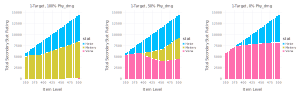

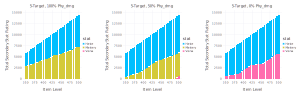

In [14]:
results = run_project_main();

Before interpreting the results, it is important to summarize some common agreements and controversies in this field. The common agreement among the blood death knight community is that "Haste is the most important secondary stat", and they suggest that blood death knights should prioritize increasing their haste rating over other secondary ratings. Another common agreement is that "Versatility" is a beneficial stat for blood death knights, and it should come after "Haste" in the priority list. However, there is a controversial opinion about "Mastery". Some players consider it to be useless, while others believe that it is as good as Versatility in certain scenarios. However, these agreements and claims lack mathematical support. This project addresses the lack of mathematical evidence in this field. Specifically, We can summarize the impact of different secondary ratings on defensive capabilities as follows:

**1. `Haste`: In almost all combat scenarios, Haste was found to be an optimal secondary stat. Moreover, in multiple-target combat, the optimal solution included a significant amount of Haste rating.**

In multi-target combat scenarios, Haste is consistently the optimal secondary stat, comprising over 50% of the total rating in the optimal solution. However, it should be noted that in single-target combat, especially in pure magical damage scenarios, Haste is not the highest priority secondary stat in the optimal solution. These findings support the blood death knight community's claim that Haste is the dominant secondary stat, as multi-target physical damage combat is more common in the game, while pure magical damage single-target combat is extremely rare. Overall, Haste plays an excellent supportive role in both adaptability to different combat scenarios and the overall defense of the blood death knight in different combat scenarios.

**2. `Mastery`: In the current expension, Mastery provides excellent defensive effectiveness against primarily physical damage in combat.**

From the outset of Blood Death Knight's design, Mastery was intended to create a shield that absorbs physical damage resulting from using Death Strike. Consequently, we focus on the defensive benefits that Mastery can provide in physical defense. In a previous expansion, Mastery was deemed an expensive and inefficient stat, requiring 240 Mastery ratings to convert into 1% (currently reduced to 180), with an effectiveness coefficient of 2.00 per 1% Mastery (currently 2.76). This led many players to consider Mastery useless and avoid equipment that included it. If Mastery cannot significantly surpass the benefits offered by Versatility in physical defense, then the defensive benefits that Blood Death Knights can obtain from Mastery will be limited. Fortunately, we have observed significant advantages of Mastery over Versatility in physical defense under the current expansion. This finding supports the idea that players should equip items with Mastery in battles primarily focused on physical damage, instead of solely considering Haste and Versatility as they did in the past.


**3. `Versatility`: an optimal stat only in single-target combat scenarios that primarily involve magic damage.**

In multi-target combat, Haste is the optimal secondary stat; in combat primarily focused on physical damage, Mastery provides greater defensive benefits than Versatility. Only in pure magical damage single-target combat scenarios is Versatility the optimal secondary stat. The Blood Death Knight community has a strong preference for the Versatility stat due to its consistent and well-rounded defensive benefits. While it may not be optimal for combat modes focused purely on physical damage, every point of Versatility still provides some defense against such damage. On the other hand, Mastery cannot offer any significant defensive benefits against magical damage through the strengthening of Death Strike. Thus, in the absence of an accurate mathematical model to determine the benefits of Mastery in physical-damage based combat mode, players tend to rely more on Versatility.


<div id="4.2"
     style="background-color:rgba(245,235,210,0.4); 
            border-radius:5px;
            height: 50px; 
            font-size: 22px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>4.2 Sensitivity Analysis and Limitations</b></p>
</div>

Sensitivity analysis is a critical aspect of this optimization project as it helps us gain a better understanding of our model and its optimal solutions. However, our sensitivity analysis has limitations that prevent it from providing all the desired information. This section will introduce sensitivity analysis and discuss its limitations in our project.

In our project, the only constraint is that the total secondary stat cannot exceed the upper bound determined by the given item level. As this constraint is tight, even a small change in the rating of a secondary stat will cause a slight change in the objective value. However, such sensitivity results have little value for us, as it is widely known that a higher item level leads to better results. Therefore, we need to explore other sensitivity analysis methods to extract meaningful insights from our model.

Players often ask about the difference between their current equipment and the optimal solution, as well as whether they should equip a high-item-level gear with poor secondary stats. Both of these questions require a sensitivity analysis of the secondary stat optimization model. In this project, we employ a simple form of parametric programming to perform the sensitivity analysis.

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>4.2.1.	Parametric Programming</b></p>
</div>

We conducted the sensitivity analysis by comparing objective values between optimal and non-optimal solutions to see the differences. Optimal solutions were computed using the **`run_project_main()`** function in section 4.1. For the non-optimal solution, we used the "evenly allocation" strategy, where 1/3 of the total secondary stats were allocated to Haste, Mastery, and Versatility. For the purposes of this project, we will refer to this allocation strategy as the **'Bucket Strategy'**. The objective value for this scenario was calculated using the **`cal_dmg_reduction()`** helper function, and the same parameters used for grouping batches of models were maintained. All settings were handled in the **`sensitivity_analysis()`** function. The resulting graphic is shown below:

In [15]:
function sensitive_analysis(results, gap5)
    
    # Combat parameters
    ITEM_LV_DOMAIN = collect(350:5:500);             # Item level range
    TGTS = [true, true, true, false, false, false];  # target numbers
    PDMG = [1.0, 0.5, 0, 1.0, 0.5, 0];               # physical damage shares
    
    # Title and helpers
    TT = map((tgt, phy) -> "$(tgt ? 1 : 5)-Target, \
                            $(convert(Int, phy * 100))% Phy_dmg", TGTS, PDMG);
    
    # Objective value when equally allocating stats
    dr_cmp = map((tgt, phy) ->
             map((lv) -> cal_dmg_reduction(repeat([ get_stat(lv)/3 ], 3), tgt, phy), ITEM_LV_DOMAIN),
             TGTS, PDMG);
    
    # Optimal objecitve values
    dr_opt = map((raw) -> getindex.(raw, 4), results);
    
    # Display results
    plots = map((y1,y2,t) -> plot_curve(ITEM_LV_DOMAIN, y1, y2, t, gap5), dr_opt, dr_cmp, TT);
        display(hstack(plots[1:3]));
        display(hstack(plots[4:6]));
end

sensitive_analysis (generic function with 1 method)

<div style="background-color:rgba(240,240,150,0.5); 
            color:rgba(145,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 14px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>* Note:</b> Reviewers can adjust the $\textbf{item_gap}$ variable to multiples of 5, like 15, 20, or 30, to update the plots dynamically.</p>
</div>

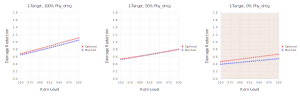

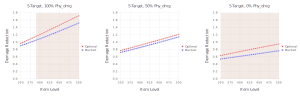

In [16]:
# We chose to use a default value of 25 for the sensitivity analysis in this study.
item_gap = 25; 
sensitive_analysis(results, item_gap);

We will use the following numbers to refer to a specific plot in the above diagram:



|1|2|3|
|-|-|-|
|**4**|**5**|**6**|

The above plots show the objective values obtained from the optimal solutions (in red) and the 'Bucket strategy' (in blue). We can observe a vertical gap between these two sets of values. While we can calculate the gap between the optimal objective values and the bucket-strategy objective values, it is difficult to interpret the meaning of these gaps in a real-world game context. In other words, while we can derive numerical values, we do not have a good way to associate these numbers with meaningful values in real life. Therefore, to help us understand the sensitivity of this model, I used an alternative approach to provide some reference.

I am using the concept of 'item gap' to measure the sensitivity of the model. To explain this concept, let's consider two sets of items: set A has the optimal solution for secondary stats but with a lower item level, while set B has an average solution but with a higher item level. In real game context, players tend to choose set B over set A if the item level gap between them is significant, say 10 levels. Although this is not a precise measure, we generally believe that a 10-level gap is significant enough to justify choosing the higher item level. 

Due to the exclusion of other defense properties such as stamina and armor in the item analysis framework, values greater than 10 were selected as the parameter when defining the item gap. For this analysis, I used a value of **`25`** for the **`item_gap`**. Specifically, at a certain item level **`t`**, if the objective value of the optimal solution is greater than the 'bucket strategy' objective value at level **`t+25`**, we recognize that the objective value at this item level is sensitive to the optimal solution. Intervals with this characteristic are marked with a light red background color. In summary, unmarked intervals can be assumed to have little impact on the objective value, while marked intervals indicate that objective values are more sensitive to optimal solutions.

In summary, based on our sensitivity analysis, we provide the following in-game suggestions:
 * For magic-damage-based combat modes (plots 3 and 6) and multi-targets physical-damage-based combat mode (plot 1), it is better to aim for item solutions that are closer to the optimal solutions.
 * For other types of combat modes, the 'Bucket strategy' solutions are acceptable.

<div style="background-color:rgba(245,235,210,0); 
            color:rgba(90,90,90,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 20px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>4.2.2.	Limitations</b></p>
</div>

**Limitation 1: Difficulty Interpreting Optimal and Non-Optimal Values in Sensitivity Analysis**

Firstly, our sensitivity analysis lacks reference context to interpret the gaps between the optimal objective values and some non-optimal values. We attempted to address this limitation by using "intermediate variables" such as `item_gap` to associate the numerical values generated by the sensitivity analysis with in-game context. However, there is still a gap in our ability to answer questions such as how much variance between the optimal solution and some non-optimal solutions can be ignored.

**Limitation 2: Uncertainty in Key Parameters, particularly `H_mul`**

Another limitation of our analysis is the accuracy of key parameters in the model, particularly the parameter `H_mul`. `H_mul` is a crucial parameter that determines the amount of benefit we can increase the Death strike per 1% Haste. This parameter has different values depending on the number of enemies, and it cannot directly use some coefficient from the in-game mechanism. To evaluate the values of `H_mul`, I conducted some simple trials using my own account. However, if we could obtain more accurate values for `H_mul`, the reliability and robustness of our model would be improved.

**Limitation 3: Simplified Model does not Account for All Factors Affecting Blood Death Knight Survivability**

A third limitation of our study is the simplification of the overall model. The local damage reduction coordinate that we selected only focuses on how secondary stats affect damage-reduction-based defense abilities, which play a dominant role in improving the survivability of Blood Death Knight. However, Blood Death Knights also have a set of healing-based defense abilities that can benefit from secondary stats, but were not included in our model. In addition, the "damage smoothing" assumption made in our model is a simplification of the real game context. Thus, our model is relatively simple and there are still many other factors that can affect the survivability of the Blood Death Knight that were not accounted for in our analysis.

---
<div id="conclusion"
     style="background-color:rgba(245,235,210,1); 
            border-radius:5px;
            height: 50px; 
            font-size: 24px; 
            padding-right: 5px;
            padding-left: 5px;">
    <p style="vertical-align: middle; line-height:50px; padding-left: 10px;"><b>5. Conclusion</b></p>
</div>

In this project, we developed a mathematical optimization model to investigate how secondary stats affect the damage reduction of Blood Death Knight(a tank specification in World of Warcraft). Despite some limitations in our assumptions and simplifications, our model provided valuable insights into the impact of different secondary stats on the survivability of the Blood Death Knight. Our results showed that `Haste` has a significant benefit in multi-target combat, while it also has a steady benefit for single-target combat. `Mastery` was found to be very effective in physical-damage-based combat modes, whereas `Versatility` was optimal for magic-damage-based combat modes. Furthermore, our sensitivity analysis suggested that it is generally better to select items that are closer to the optimal solution for magic-damage-based and multi-target physical-damage-based combat, whereas a relative evenly allocation over different types of stats is acceptable in other cases. Overall, our findings contribute to a better understanding of the optimal secondary stats allocation for Blood Death Knight, and we hope that our model can be further refined and extended in future studies.

An important future direction for research is to establish a comprehensive framework for tank specifications in World of Warcraft. Currently, within the gaming community, there is no standardized framework, and players often rely on local or simple frameworks to analyze the survivability of tank specifications. A comprehensive framework should encompass all necessary defense attributes, such as `HP`, `stamina`, `armor`, `parry`, `dodge`, `block`, as well as various other damage reduction mechanisms and secondary attributes. Unlike damage-dealer specifications, which have well-developed simulator tools, tank specifications could benefit from the development of simulator tools to more accurately assess their performance under different combat parameters. If a comprehensive analysis framework and reliable simulators are established, it would significantly enhance future studies on tank specifications.

<hr>
<div style="background-color:rgba(245,245,245,1);
            color:rgba(145,145,145,1);
            border-radius:5px;
            height: 40px; 
            font-size: 14px; 
            display: flex; 
            justify-content: center;">
    <h4 style="text-align: center; width:100%;"><a href="#homecell">Back to Top</a></h4>
</div>